In [37]:
import pandas as pd
import glob
import numpy as np
import pickle

In [38]:
#1. Load cleaned submissions and comments data

with open("cleaned_data\submissions_cleanead", 'rb') as file:
    submissions = pickle.load(file)

with open("cleaned_data\comments_cleanead", 'rb') as file:
    comments = pickle.load(file)

In [42]:
print(submissions)
print(comments)

            id        author  created_utc   subreddit subreddit_id  \
0        648oo         DITUS   1199145615  reddit.com         t5_6   
1        648op        rmuser   1199145634     science      t5_mouw   
3        648or         zorno   1199145709  reddit.com         t5_6   
4        648os        rmuser   1199145735    politics     t5_2cneq   
5        648ot         zorno   1199145735  reddit.com         t5_6   
...        ...           ...          ...         ...          ...   
2519847  7amgd     hunkydude   1225497545      Health     t5_2qh9z   
2519848  7amge  violetplanet   1225497549    BlackOps     t5_2qhwv   
2519850  7amgg    justblogit   1225497564  reddit.com         t5_6   
2519851  7amgh  guillebravo6   1225497573     offbeat     t5_2qh11   
2519852  7amgi     qazamisan   1225497591  reddit.com         t5_6   

         num_comments  score  over_18  
0                   1      0    False  
1                   5     20    False  
3                   1      3    False  

In [56]:
comments = comments.reset_index()
submissions = submissions.reset_index()

In [76]:
#1.1 Number of unique subreddits, subreddits with most comments and most users

submissions_unique_subreddits = submissions['subreddit'].unique()
comments_unique_subreddits = comments['subreddit'].unique()

unique_subreddits = list(set(np.concatenate([submissions_unique_subreddits, comments_unique_subreddits])))
print('Number of unique subreddits : ', len(unique_subreddits))


comments_by_subreddits = comments[['id', 'subreddit']].groupby('subreddit')
comments_by_subreddits_aggregated = comments_by_subreddits.size().sort_values(axis=0, ascending=False)
print('\nTop 10 subreddits with most comments:\n', comments_by_subreddits_aggregated.head(10))

submission_authors_by_subreddits = submissions[['author', 'subreddit']]
comments_authors_by_subreddits = comments[['author', 'subreddit']]
aggregated_authors_by_subreddits = pd.concat([submission_authors_by_subreddits, comments_authors_by_subreddits])
aggregated_authors_by_subreddits.drop_duplicates(subset=None, keep="first", inplace=True)
aggregated_authors_by_subreddits = aggregated_authors_by_subreddits.groupby('subreddit')
authors_by_subreddits_sorted = aggregated_authors_by_subreddits['author'].size().sort_values(axis=0, ascending=False)
print('\nTop 10 subreddits with most users:\n', authors_by_subreddits_sorted.head(10))

Number of unique subreddits :  4359

Top 10 subreddits with most comments:
 subreddit
reddit.com     1143183
politics        801396
programming     345997
pics            286192
science         238291
worldnews       228793
WTF             187876
funny           175547
technology      149803
AskReddit       139760
dtype: int64

Top 10 subreddits with most users:
 subreddit
reddit.com       163779
politics          38374
pics              29753
technology        28337
funny             28186
entertainment     26360
science           25854
programming       25819
business          25253
worldnews         24937
Name: author, dtype: int64


In [78]:
1.2
total_authors_on_subreddits = authors_by_subreddits_sorted.sum()
total_active_subbreddits = authors_by_subreddits_sorted.count()
avg_number_of_active_authors_on_subreddits = total_authors_on_subreddits/total_active_subbreddits
print(avg_number_of_active_authors_on_subreddits)

148.66506079376003


In [46]:
#Save unique subreddits for graph nodes
unique_subreddits_path =r"cleaned_data\unique_subreddits"
with open(unique_subreddits_path, 'wb') as file:
    pickle.dump(unique_subreddits, file)

In [63]:
#1.3 Users with most submissions and most comments

submissions_by_authors = submissions[['id', 'author']].groupby('author')
submissions_by_authors_aggregated = submissions_by_authors.size().sort_values(axis=0, ascending=False)
submissions_by_authors_aggregated.reset_index().rename(columns={"id":"submissions_count"}, inplace=True)
print('\nTop 10 Users with most submissions:\n', submissions_by_authors_aggregated.head(10))

comments_by_authors = comments[['id', 'author']].groupby('author')
comments_by_authors_aggregated = comments_by_authors.size().sort_values(axis=0, ascending=False)
comments_by_authors_aggregated.reset_index().rename(columns={'id':'comments_count'}, inplace=True)
print('\nTop 10 Users with most comments:\n', comments_by_authors_aggregated.head(10))



Top 10 Users with most submissions:
 author
gst                 18870
qgyh2               12238
rmuser               9822
twolf1               8597
IAmperfectlyCalm     8308
qazamisan            6927
charlatan            5998
igeldard             5373
noname99             5334
democracy101         5332
dtype: int64

Top 10 Users with most comments:
 author
NoMoreNicksLeft     13480
malcontent          12159
matts2              11672
mexicodoug           9169
7oby                 9161
aletoledo            8085
mutatron             7771
otakucode            7759
redditcensoredme     7468
h0dg3s               7439
dtype: int64


In [64]:
#1.4 Users active on most subreddits

aggregated_authors_by_subreddits = pd.concat([submission_authors_by_subreddits,comments_authors_by_subreddits])
aggregated_authors_by_subreddits.drop_duplicates(subset=None, keep="first", inplace=True)
aggregated_authors_by_subreddits = aggregated_authors_by_subreddits.groupby('author')
authors_by_subreddits_sorted = aggregated_authors_by_subreddits['subreddit'].agg(np.size).sort_values(axis=0, ascending=False)
print('\nTop 10 users active on most subreddits:\n', authors_by_subreddits_sorted.head(10))


Top 10 users active on most subreddits:
 author
MrKlaatu          181
Escafane          154
omfgninja         122
scientologist2    111
codepoet          111
turkourjurbs      110
b34nz             107
Sylveran-01       107
krugerlive        106
tuoder            103
Name: subreddit, dtype: int64


In [72]:
#1.5 Pearson corelation coefficient
df1 = submissions_by_authors_aggregated.to_frame()
df2 = comments_by_authors_aggregated.to_frame()
author_info = pd.merge(df1,df2, on='author')
print(author_info.head(10))
pearson_coef = author_info.corr(method='pearson')
print('\n',pearson_coef)

                        0_x   0_y
author                           
gst                   18870   300
qgyh2                 12238  2618
rmuser                 9822  3293
twolf1                 8597   266
IAmperfectlyCalm       8308    40
charlatan              5998  1159
igeldard               5373   568
noname99               5334   398
democracy101           5332   138
georgewashingtonblog   5299   911

           0_x       0_y
0_x  1.000000  0.150412
0_y  0.150412  1.000000


In [110]:
df = author_info[['submissions_count', 'comments_count']]
print(df)
df['submissions_count_rank'] = author_info['submissions_count'].rank(ascending=False) 
df['comments_count_rank'] = author_info['comments_count'].rank(ascending=False) 
df_sorted = df.sort_values(['submissions_count_rank'], ascending=True)
print(df_sorted)

                  submissions_count  comments_count
author                                             
gst                           18870             300
qgyh2                         12238            2618
rmuser                         9822            3293
twolf1                         8597             266
IAmperfectlyCalm               8308              40
...                             ...             ...
ghandi                            1               1
ghais                             1               4
ggruschow                         1               7
gf3                               1               1
gezas                             1             120

[47279 rows x 2 columns]
                  submissions_count  comments_count  submissions_count_rank  \
author                                                                        
gst                           18870             300                     1.0   
qgyh2                         12238            2618          

In [130]:
import matplotlib.pyplot as plt

def plot_rank_correlation(x_rank, y_rank, x_label, y_label):                                                    

    plt.figure(1)   

    # prep axes   
    plt.xlabel(x_label)                                                                                                            
    plt.xscale('linear')                                                                                                                
    plt.xlim(1, max(x_rank))  

    plt.ylabel(y_label)                                                                                                          
    plt.yscale('linear')                                                                                                                
    plt.ylim(1, max(y_rank))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x_rank, y_rank, marker='.')                                                                                                    
    plt.show()

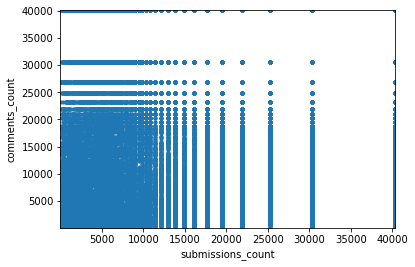

In [131]:
plot_rank_correlation(df['submissions_count_rank'], df['comments_count_rank'], 'submissions_count', 'comments_count')

In [84]:
#1.6 Submissions with most comments

with open("cleaned_data\submissions_cleanead", 'rb') as file:
    submissions2 = pickle.load(file)

with open("cleaned_data\comments_cleanead", 'rb') as file:
    comments2 = pickle.load(file)
submissions_with_num_of_comments = submissions[['id','num_comments', 'over_18', 'subreddit', 'permalink']].sort_values(by=['num_comments'], ascending=False)
print(submissions_with_num_of_comments.head(10))

            id  num_comments  over_18   subreddit
1470752  6nz1k         33329    False     science
2428144  78n1v          3657    False         WTF
135995   675oj          2039    False  reddit.com
326364   7beo2          1934    False    politics
1743984  6tvaz          1425    False    politics
1985077  6z2e2          1425    False  reddit.com
1072149  6fccd          1411    False  reddit.com
137102   676ja          1377    False  reddit.com
2224242  7488a          1346    False    politics
1087277  6fo4i          1342    False  reddit.com


In [25]:
with open("cleaned_data\submissions_cleaned2", 'rb') as file:
    submissions2 = pickle.load(file)

with open("cleaned_data\comments_cleaned2", 'rb') as file:
    comments2 = pickle.load(file)

In [26]:
submissions_with_num_of_comments2 = submissions2[['id','num_comments', 'over_18', 'subreddit', 'url']].sort_values(by=['num_comments'], ascending=False)
for permalink in submissions_with_num_of_comments2['url'].head(10):
      print(permalink, "  ")

http://hundredpushups.com   
http://www.time.com/time/nation/article/0,8599,1822455,00.html   
https://www.reddit.com/r/reddit.com/comments/675oj/post_the_funniest_joke_you_know_upmod_the_best_one/   
https://www.reddit.com/r/politics/comments/7beo2/obama_wins_the_presidency/   
https://www.reddit.com/r/politics/comments/6tvaz/im_a_bleedingheart_liberal_but_am_i_the_only_one/   
http://www.nytimes.com/reuters/us/international-usa-politics-palin.html?_r=1&amp;oref=slogin   
http://www.london-airport-shuttle.co.uk   
http://www.washingtonpost.com/wp-dyn/content/custom/2006/02/02/CU2006020201345.html   
http://www.msnbc.msn.com/id/26884523/?   
https://www.reddit.com/r/reddit.com/comments/6fo4i/ask_a_muslim/   
